# Problématique de l'énigme de la porte du temps 

### Présentation de l'énigme

Un trésor est à trouver, gardé derrière l'une ou l'autre des deux portes ;
2 gardiens : 
- un dit la vérité, l'autre ment ; 
- chaque gardien sait si l'autre ment ;

Défi :

Poser une question à un seul de ces gardiens pour obtenir la localisation du trésor (porte de gauche ou porte de droite).

Solution :
- la question à poser est : quelle porte l'autre gardien me dirait de ne PAS prendre ?
- Explications : les réponses des deux gardiens sont toujours l'opposé l'une de l'autre si l'on demande : "derrière quelle porte est le trésor ou derrière qu'elle porte n'est pas le trésor ?".

Si l'on demande : 
"quelle porte l'autre gardien me dirait de ne PAS prendre ?", 
les deux gardiens donneront la même réponse :
    
    - imaginons que le trésor est caché derrière la porte de droite, et que le gardien de droite ment :

        - si on demande au gardien de droite : "quelle porte l'autre gardien me dirait de ne PAS prendre?", il ment et va répondre "l'autre gardien dirait de ne PAS prendre la porte de droite".

        - si on demande au gardien de gauche : "quelle porte l'autre gardien me dirait de ne PAS prendre?", il va dire la vérité et comme il sait que le gardien de droite ment, il va répondre "l'autre gardien dirait de ne PAS prendre la porte de droite".

## importation des librairies

In [1]:
from qiskit import Aer, QuantumCircuit, transpile, assemble, execute
from qiskit.visualization import plot_histogram, plot_state_city

## Construction du circuit quantique

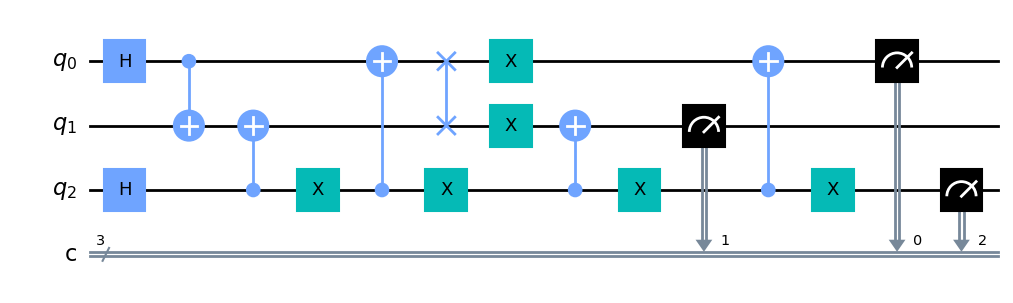

In [2]:
# Création du circuit
qc = QuantumCircuit(3, 3)

#On applique une porte de Hadamard sur les portes 0 et 2
qc.h(0)
qc.h(2)

# On applique une porte de CNOT sur les portes 0 et 1
qc.cx(0,1)

# On applique une porte de CNOT sur les portes 2 et 1
qc.cx(2,1)
qc.x(2)
qc.cx(2,0)
qc.x(2)

#on applique une porte de permutation sur les portes 0 et 1
qc.swap(0,1)
qc.x(0)
qc.x(1)
qc.cx(2,1)
qc.x(2)
qc.cx(2,0)
qc.x(2)


# Mesurer le résultat
qc.measure([0, 1, 2], [0, 1, 2])

qc.draw('mpl')  # Pour afficher le circuit

## Exécution du circuit et visualisation des résultats

In [3]:
backend = Aer.get_backend('qasm_simulator')
t_qc = transpile(qc, backend)
qobj = assemble(t_qc)
result = execute(qc, backend).result()
counts = result.get_counts()

print(f"counts: {counts}")

counts: {'111': 249, '000': 241, '011': 266, '100': 268}


### Visualisation du résultats dans un histogramme

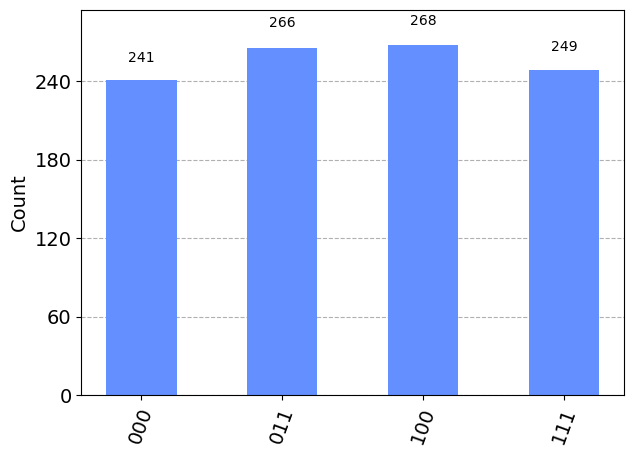

In [4]:
plot_histogram(counts)